In [2]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from matplotlib import gridspec
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

filenames = ['Src_Bos_20151215_bw2020_gain120_161211.xml',
            'Src_BosI_20151215_bw2020_gain120_163633.xml',
            'Src_Erl_20151215_bw2020_gain120_170056.xml',
            'Src_Gef_20151215_bw2020_gain120_172518.xml']

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
    
label = 'em280'


### Plot data at 480 nm

# Logx plot

In [3]:
## Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    
    prot_well_name = 'A%s' % index
    Bos_prot_reads = list(reads[0][label][prot_well_name].values())
    Bos_prot_reads = [x if x != 'OVER' else 0 for x in Bos_prot_reads]
    Bos_prot_reads = [float(i) for i in Bos_prot_reads]
    Bos_prot[well] = Bos_prot_reads[40]

    buff_well_name = 'B%s' % index
    Bos_buff_reads = list(reads[0][label][buff_well_name].values())
    Bos_buff_reads = [x if x != 'OVER' else 0 for x in Bos_buff_reads]
    Bos_buff_reads = [float(i) for i in Bos_buff_reads]
    Bos_buff[well] = Bos_buff_reads[40]
    
    
Bos_iso_prot = np.zeros(12)
Bos_iso_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    
    prot_well_name = 'C%s' % index
    Bos_iso_prot_reads = list(reads[1][label][prot_well_name].values())
    Bos_iso_prot_reads = [x if x != 'OVER' else 0 for x in Bos_iso_prot_reads]
    Bos_iso_prot_reads = [float(i) for i in Bos_iso_prot_reads]
    Bos_iso_prot[well] = Bos_iso_prot_reads[40]
    
    buff_well_name = 'D%s' % index
    Bos_iso_buff_reads = list(reads[1][label][buff_well_name].values())
    Bos_iso_buff_reads = [x if x != 'OVER' else 0 for x in Bos_iso_buff_reads]
    Bos_iso_buff_reads = [float(i) for i in Bos_iso_buff_reads]
    Bos_iso_buff[well] = Bos_iso_buff_reads[40]
    
Erl_prot = np.zeros(12)
Erl_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot_reads = list(reads[2][label][prot_well_name].values())
    Erl_prot_reads = [x if x != 'OVER' else 0 for x in Erl_prot_reads]
    Erl_prot_reads = [float(i) for i in Erl_prot_reads]
    Erl_prot[well] = Erl_prot_reads[40]
    
    buff_well_name = 'F%s' % index
    Erl_buff_reads = list(reads[2][label][buff_well_name].values())
    Erl_buff_reads = [x if x != 'OVER' else 0 for x in Erl_buff_reads]
    Erl_buff_reads = [float(i) for i in Erl_buff_reads]
    Erl_buff[well] = Erl_buff_reads[40]
    

Gef_prot = np.zeros(12)
Gef_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    
    prot_well_name = 'G%s' % index
    Gef_prot_reads = list(reads[3][label][prot_well_name].values())
    Gef_prot_reads = [x if x != 'OVER' else 0 for x in Gef_prot_reads]
    Gef_prot_reads = [float(i) for i in Gef_prot_reads]
    Gef_prot[well] = Gef_prot_reads[40]
    
    buff_well_name = 'H%s' % index
    Gef_buff_reads = list(reads[3][label][buff_well_name].values())
    Gef_buff_reads = [x if x != 'OVER' else 0 for x in Gef_buff_reads]
    Gef_buff_reads = [float(i) for i in Gef_buff_reads]
    Gef_buff[well] = Gef_buff_reads[40]

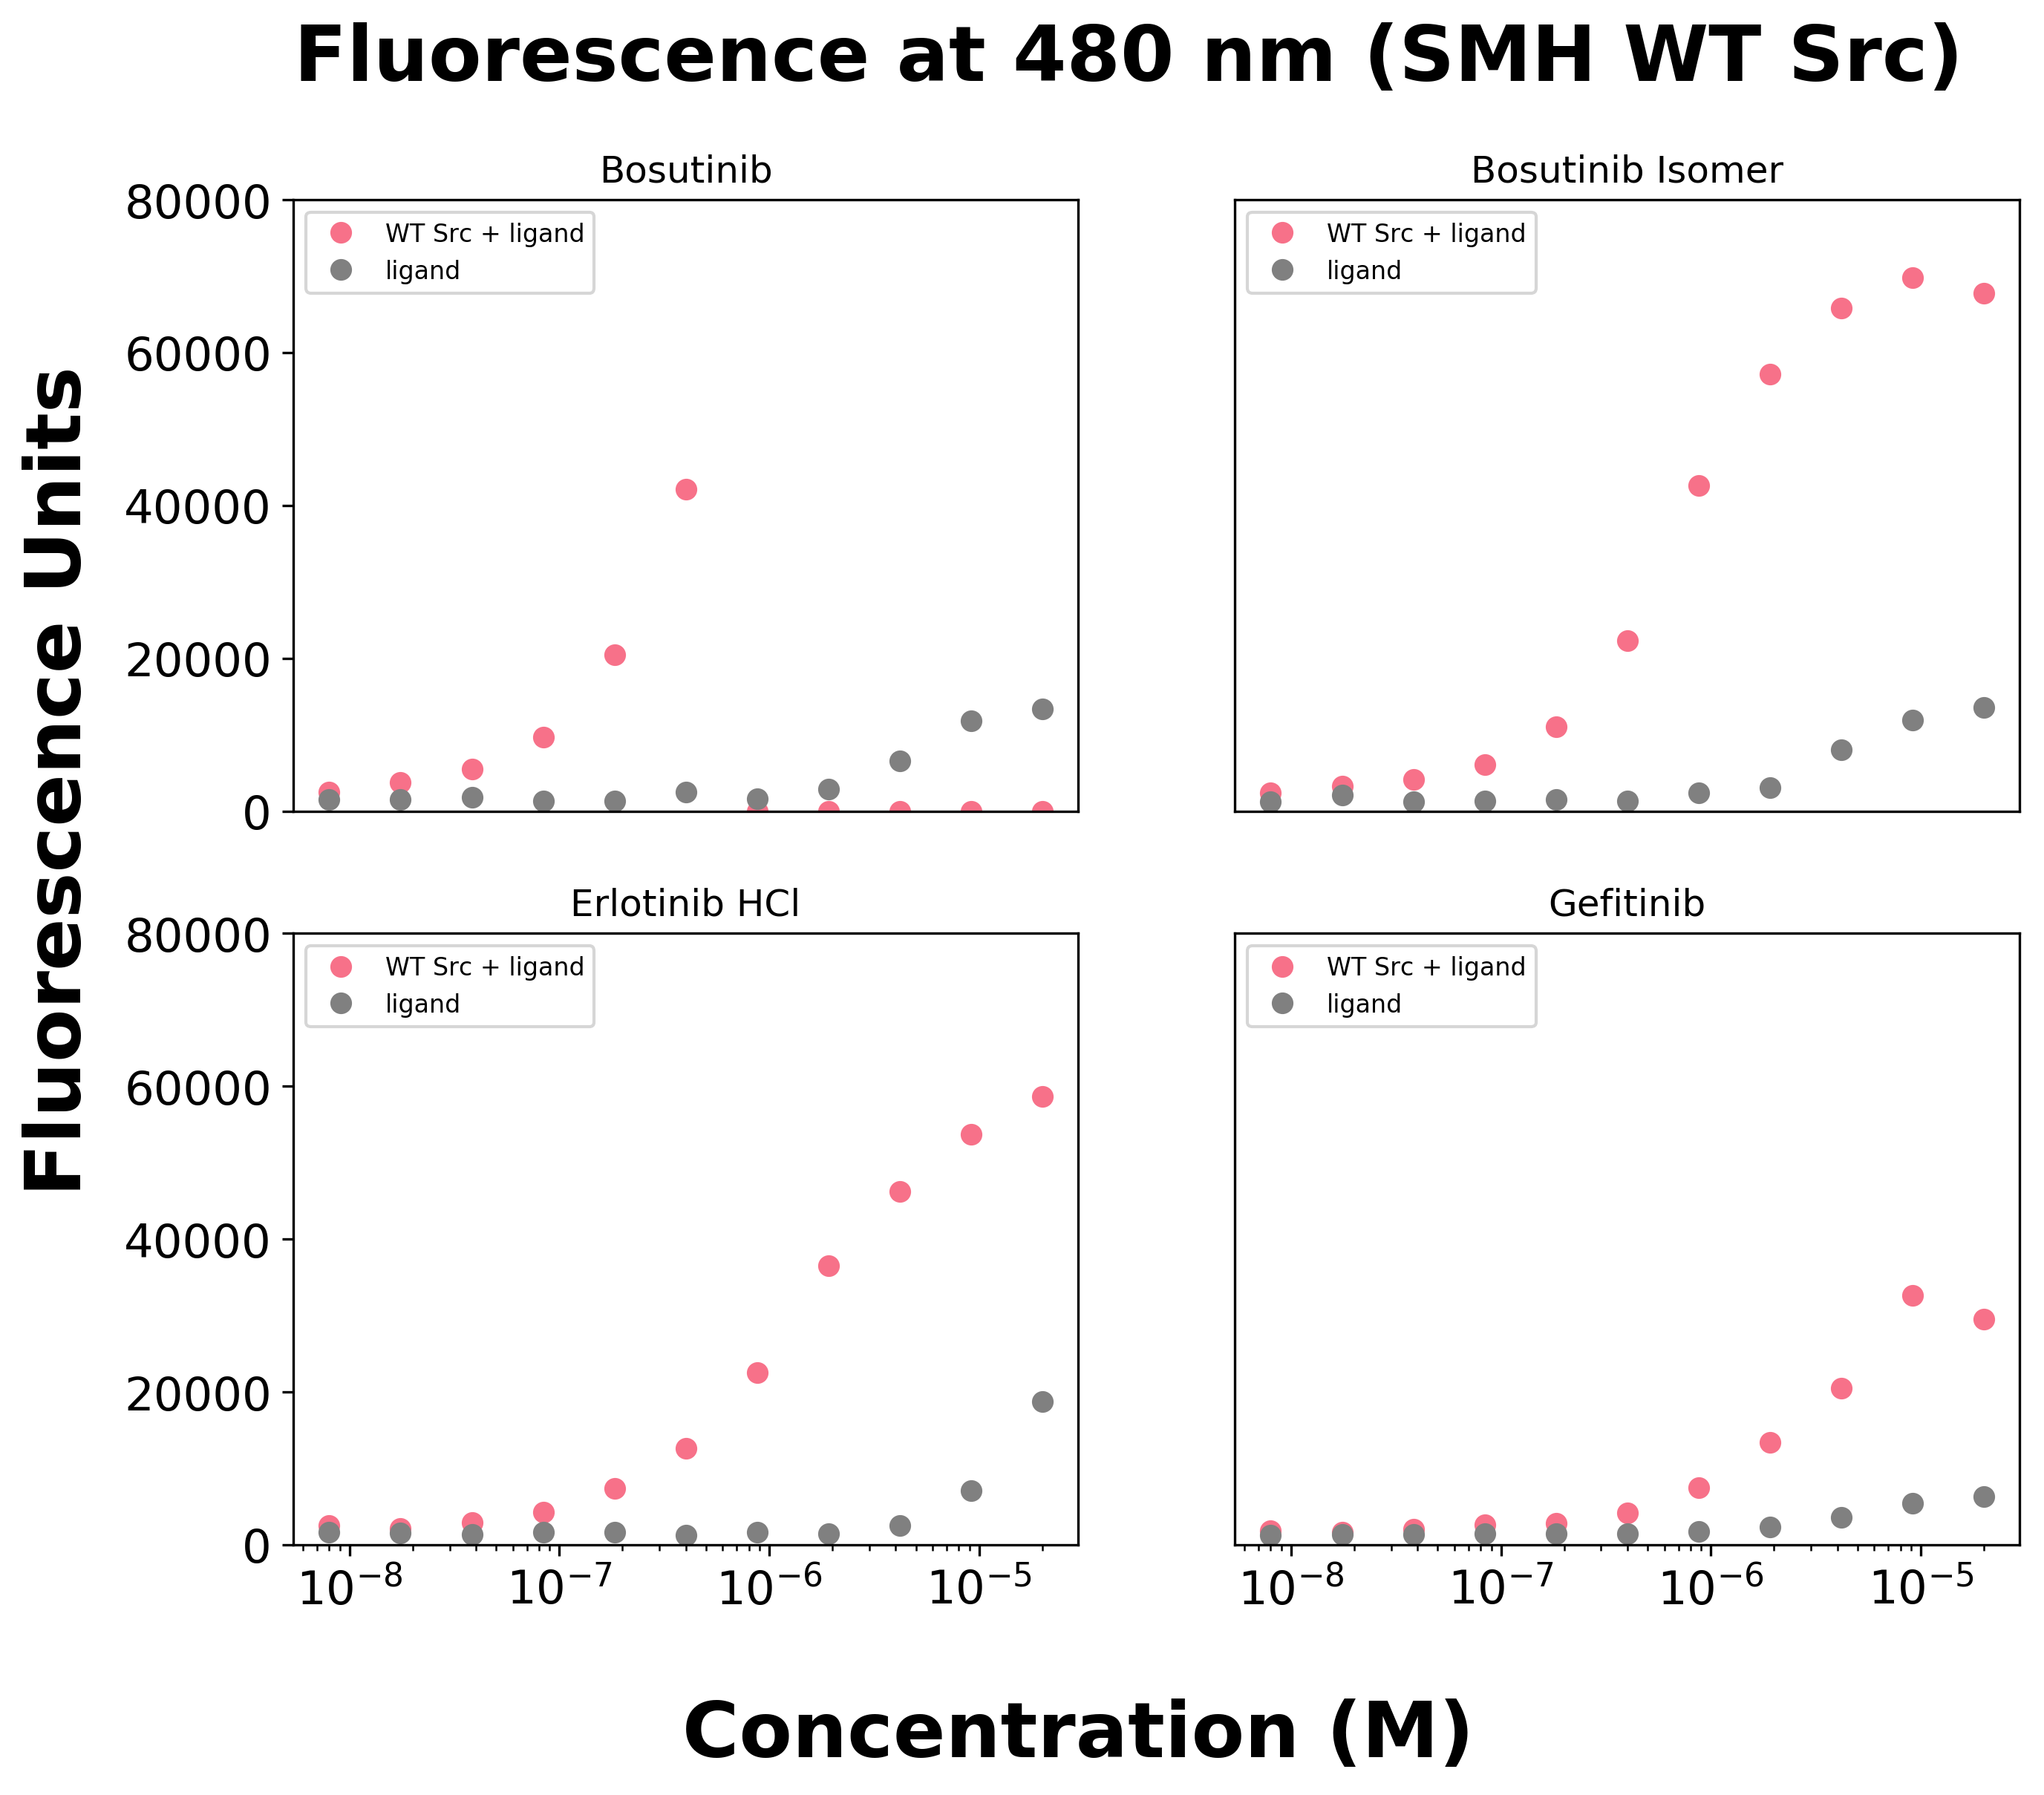

In [7]:
## make 4 plots, one for each ligand at 480 nm Em
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[0]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (SMH WT Src)', fontsize=25, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 80000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)


# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 80000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 80000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)
    

# Plot fluorescence
ax1 = fig.add_subplot(2,2,4)
plt.semilogx(concentrations, np.flip(Gef_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Gef_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 80000)
ax1.yaxis.set_ticks([])

ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Gefitinib')
    


fig.savefig('20151215_SMH_WT Src_logx_%s.pdf' % wavelength, dpi=300)

# Log Log plot


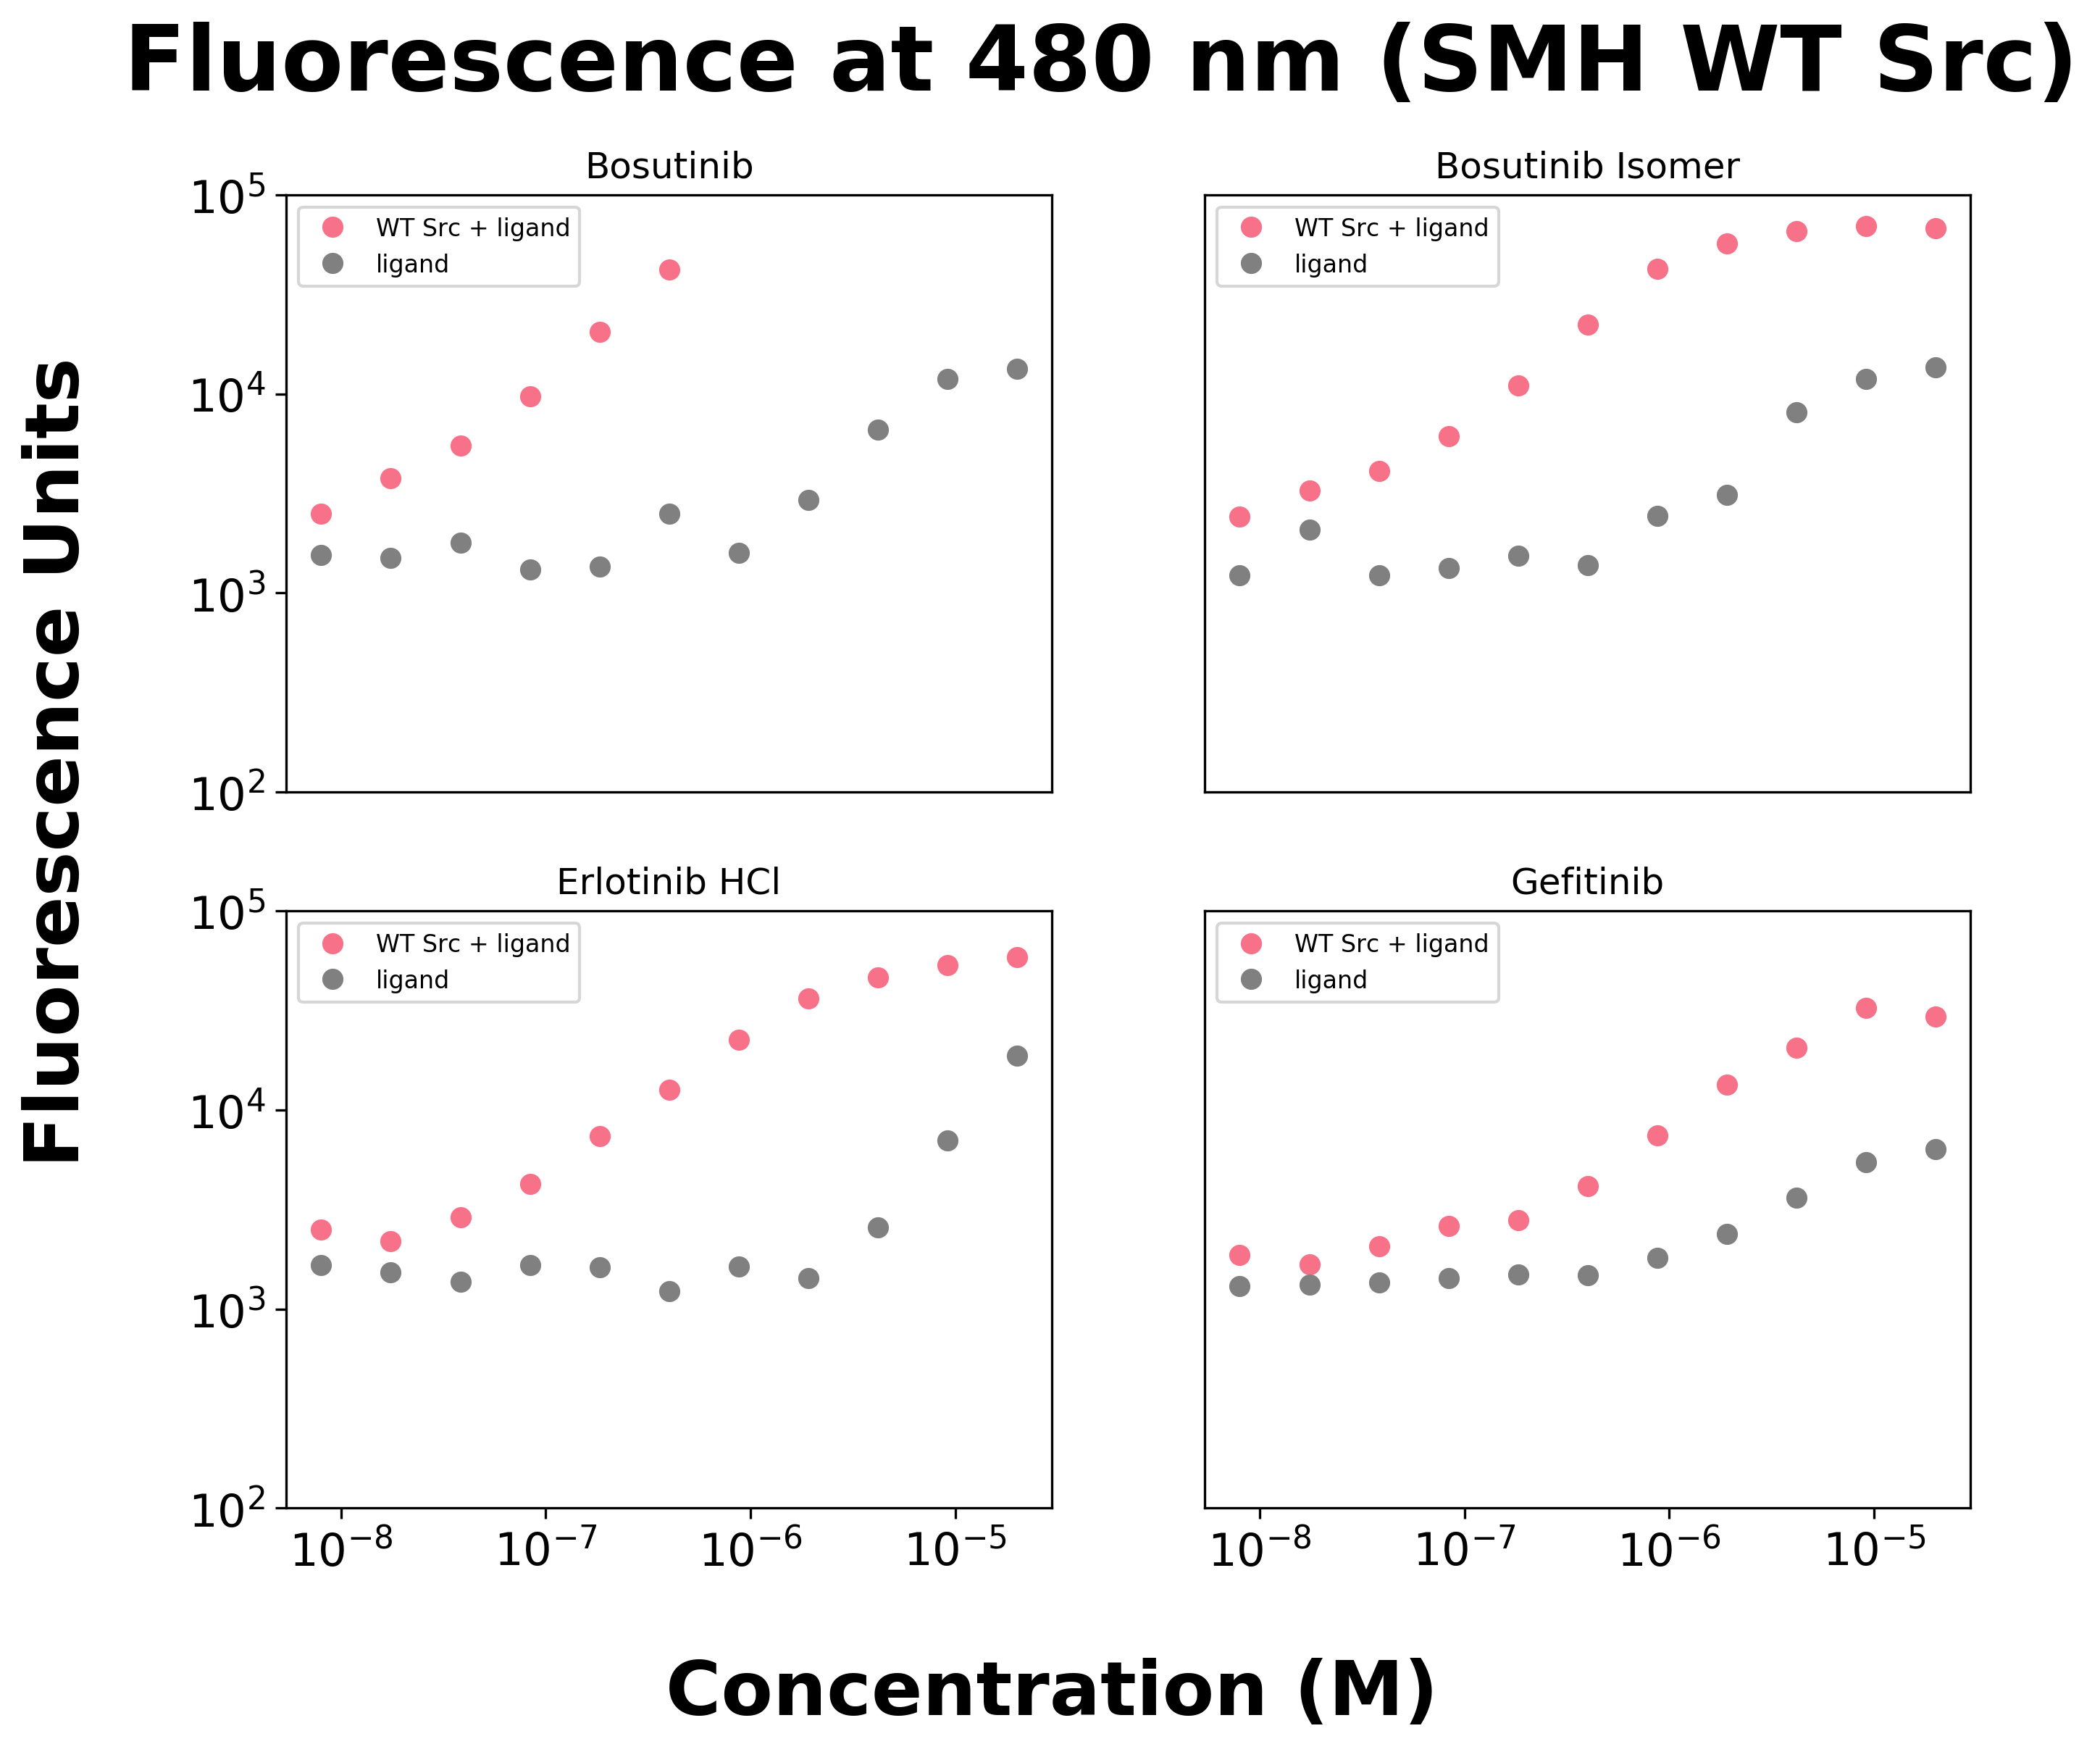

In [8]:
## make 4 plots, one for each ligand at all wavelengths
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[0]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (SMH WT Src)', fontsize=30, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
# Plot fluorescence
plt.loglog(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)
    

# Plot fluorescence
ax1 = fig.add_subplot(2,2,4)
plt.loglog(concentrations, np.flip(Gef_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Gef_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)
ax1.yaxis.set_ticks([])
plt.minorticks_off()

ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Gefitinib')
    


fig.savefig('20151215_SMH_WT Src_loglog_%s.pdf' % wavelength, dpi=300)